In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Here we work on analyzing the titanic dataset from Kaggle
titanic_df = pd.read_csv('/home/mitalideshpande/titanic_train.csv')

In [4]:
# After loading the dataset we view the dataset and try to understand its columns and data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Total number of rows are 891. we can see age, cabin and embarked columns do have null values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
#Lets answer some data analysis questions
#1) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
#2) What deck were the passengers on and how does that relate to their class?
#3) Where did the passengers come from?
#4) Who was alone and who was with family?
#5) What factors helped someone survive the sinking? 

In [31]:
# Let's start with analyzing with Q1 : Provide information about the passengers.
titanic_df.Age.isnull().value_counts()     # check for null/not null values in columns# 

False    714
True     177
Name: Age, dtype: int64

In [34]:
titanic_df.columns    #check for the list of columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

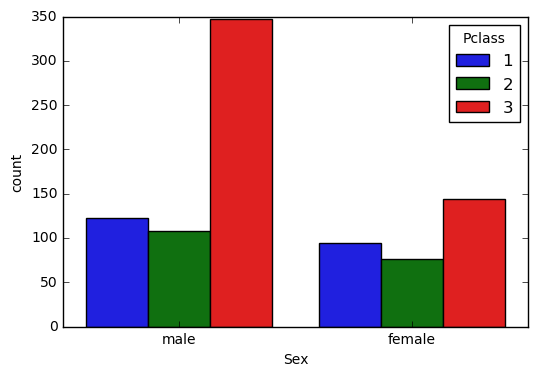

In [37]:
sns.countplot(x='Sex',data=titanic_df,hue='Pclass')   # Let's create a bar graph based on Sex
# Here we check Sex of passengers based on Pclass

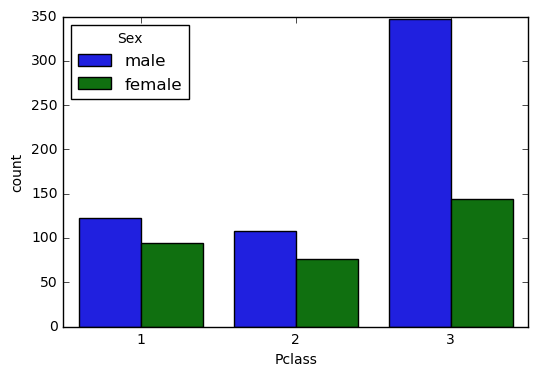

In [38]:
# Another way to look at it is we can see class wise distrubution
sns.countplot(x='Pclass',data=titanic_df,hue='Sex')     # We can see 3rd class passengers had maximum males and females

In [56]:
def child_adult(Passenger):
    Age,Sex=Passenger
    if Age < 12:
        return 'Child'
    else:
        return Sex

In [59]:
titanic_df['P_Status'] = titanic_df[['Age','Sex']].apply(child_adult, axis=1)

In [60]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,P_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,female


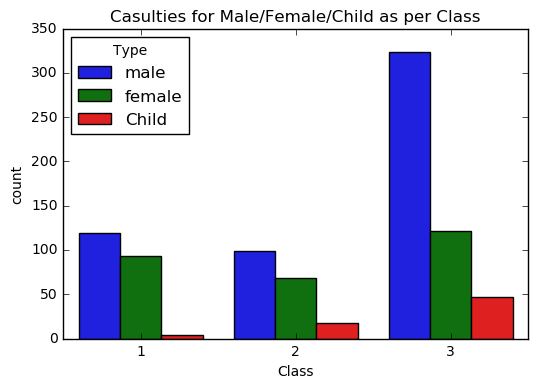

In [84]:
sns.countplot(x='Pclass', data=titanic_df, hue='P_Status')          # Customize the plot
plt.legend(loc='upper left').set_title('Type')
plt.title('Casulties for Male/Female/Child as per Class')
plt.xlabel('Class')

In [85]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,P_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


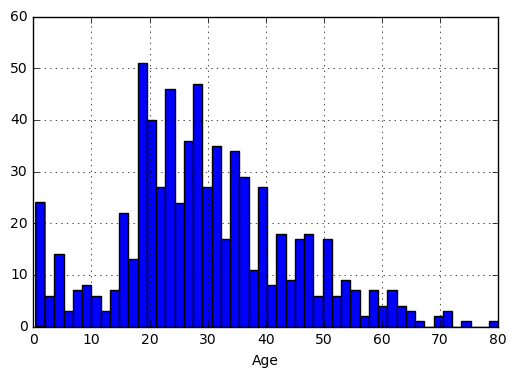

In [93]:
titanic_df['Age'].hist(bins=50)
plt.xlabel('Age')

In [108]:
titanic_df['P_Status'].value_counts()

male      541
female    282
Child      68
Name: P_Status, dtype: int64

In [114]:
titanic_df[titanic_df.P_Status == 'male'].Age.mean()            # Mean age of males onboard

32.986810551558754

In [115]:
titanic_df[titanic_df.P_Status == 'female'].Age.mean()          # Mean age of females onboard

31.146288209606986

In [116]:
# Q2. Relationship between deck and class
# Find what deck the passengers where. There are NaN values in deck column which we drop
deck = titanic_df['Cabin'].dropna()

In [117]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [137]:
levels=deck.str.get(0) 
cabin_df = pd.DataFrame(levels)
cabin_df['Cabin'].unique()             # We can see there is some T value which needs to be dropped

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [139]:
cabin_df = cabin_df[cabin_df.Cabin !='T']

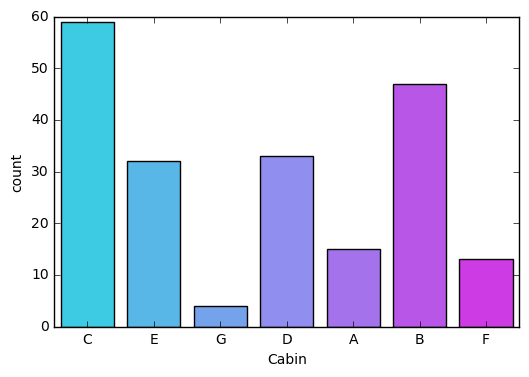

In [153]:
sns.countplot('Cabin',data=cabin_df,palette='cool')

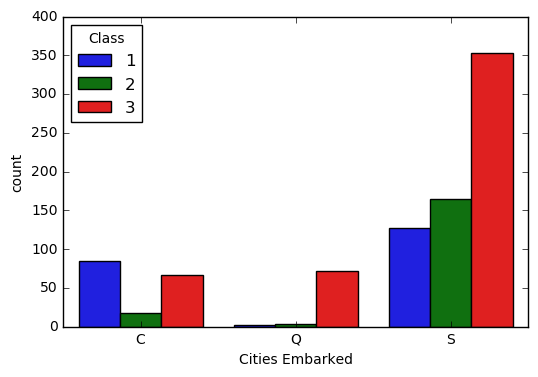

In [167]:
# We will see relationship between Class and city they embarked i.e boarded Titanic
sns.countplot('Embarked',data=titanic_df, hue='Pclass',order=['C', 'Q', 'S'])
plt.legend(loc='upper left').set_title('Class')
plt.xlabel('Cities Embarked')
# We can see from the plot that maximum people from Class 3 embarked from Southampton. Very few people seemed to have embarked 
# from Queenstown

In [169]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [202]:
# Q4. Who was alone and who was with family?
titanic_df.head()
# We combine columns SibSp + Parch to see if the passenger was alone or had either a sibling or parent
titanic_df['Alone'] = (titanic_df['SibSp'] + titanic_df['Parch'])

In [204]:
#titanic_df.info()    # when we create 'Alone' column its of datatype int update it withfamily/withoutfamily we need to convert in
                    # into from int to str
#titanic_df.Alone = titanic_df.Alone.astype(str)

# Look for >0 or ==0 to set alone status
titanic_df['Alone'] = np.where(titanic_df['Alone'] >= 1, 'Family', 'Alone')

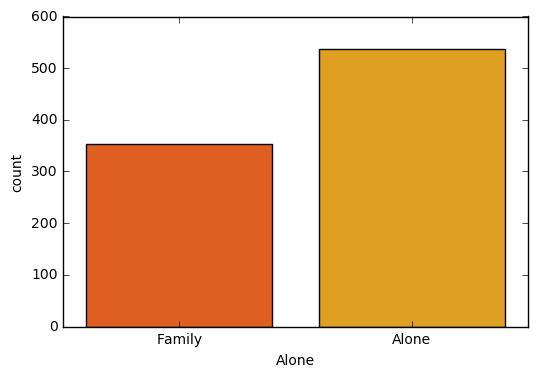

In [221]:
sns.countplot('Alone', data=titanic_df, palette='autumn')

# From the given visulization we can see that maximum passengers on board were alone

In [246]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 

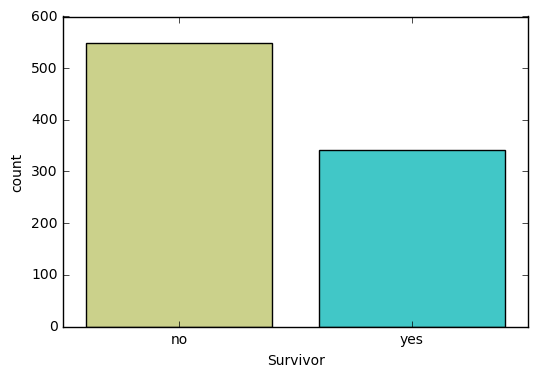

In [253]:
sns.countplot('Survivor',data=titanic_df, palette='rainbow_r')

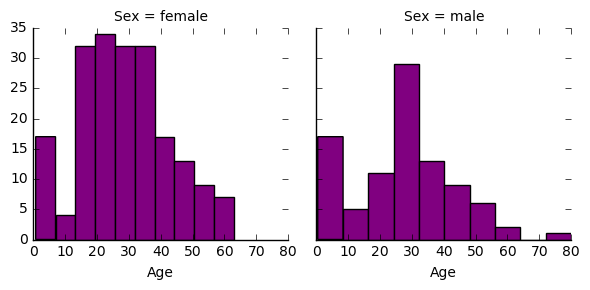

In [289]:
# Let's use a facetgrid to see age of survived passengers 
survived_df = titanic_df[(titanic_df.Survivor == 'yes')]
g = sns.FacetGrid(survived_df, col='Sex')
g.map(plt.hist,'Age', bins=10, color='purple')
plt.show()

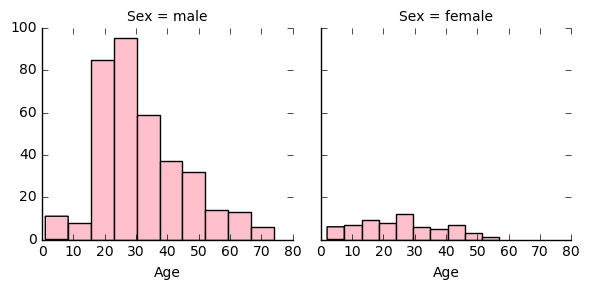

In [290]:
# Similarly we see for died passengers
died_df = titanic_df[(titanic_df.Survivor == 'no')]
g = sns.FacetGrid(died_df, col='Sex')
g.map(plt.hist,'Age', bins=10, color='pink')
plt.show()

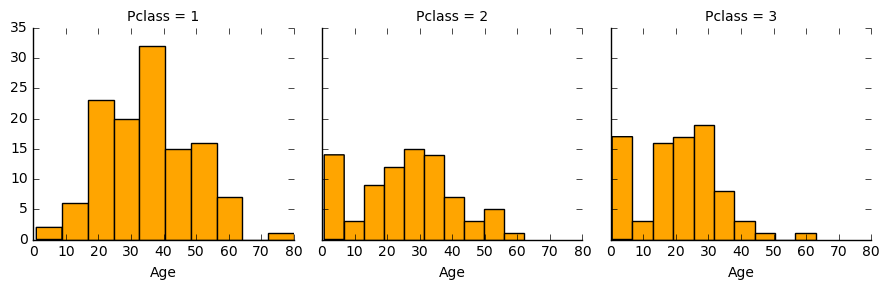

In [297]:
g = sns.FacetGrid(survived_df, col='Pclass')
g.map(plt.hist,'Age', bins=10, color='orange')
plt.show()

# We can see first class passengers had a larger chance of surviving as compared to 3rd class